# **Mall Customer Segmentation**

Tópicos

1. Introdução
2. Análise exploratória
3. Agrupamento


Um shopping quer segmentar seus clientes para melhorar ações de marketing. Para isso organiza um programa de fidelidade no qual os clientes cadastrads trocam suas notas fiscais de compras em lojas do shopping por bilhetes de um sorteio

O objetivo é:

- Encontrar um conjunto de perfis médios
- Alocar os clientes num perfil mais próximo


Para isso precisamos responder:

- Qual a quantidade de grupos?
- Quais são as características de cada grupo?
- Como calcular a distância entre o grupo e os clientes?


Dataset disponível em: 
https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python


# **Análise exploratória com Python**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
mall = pd.read_csv('https://raw.githubusercontent.com/julliebelmonte/mall-customer-segmentation/main/Mall_Customers.csv', sep = ',')

In [ ]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
mall.tail() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
mall.shape

(200, 5)

In [ ]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Remover coluna id


In [ ]:
mall = mall.drop('CustomerID', axis=1)

In [ ]:
mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Exploração dos dados - resumindo quantitativamente as variáveis numéricas


In [ ]:
mall.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [ ]:
mall[['Gender']].describe().T

,count,unique,top,freq
Gender,200,2,Female,112


Visualização de dados 

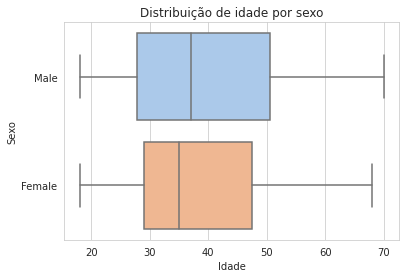

In [ ]:
with sns.axes_style('whitegrid'):
  grafico=sns.boxplot(data=mall, x= 'Age', y= 'Gender', palette='pastel')
  grafico.set(title='Distribuição de idade por sexo', xlabel='Idade', ylabel='Sexo')

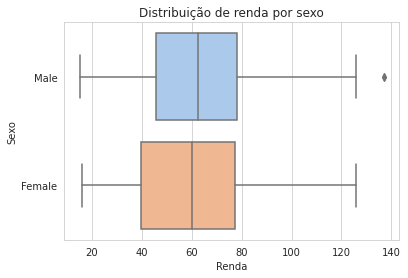

In [ ]:
with sns.axes_style('whitegrid'):
  grafico=sns.boxplot(data=mall, x= 'Annual Income (k$)', y= 'Gender', palette='pastel')
  grafico.set(title='Distribuição de renda por sexo', xlabel='Renda', ylabel='Sexo')

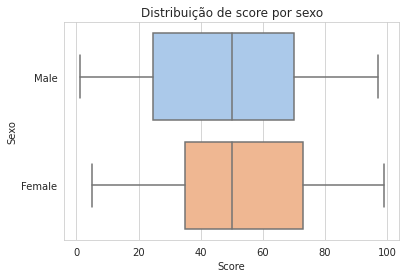

In [ ]:
with sns.axes_style('whitegrid'):
  grafico=sns.boxplot(data=mall, x= 'Spending Score (1-100)', y= 'Gender', palette='pastel')
  grafico.set(title='Distribuição de score por sexo', xlabel='Score', ylabel='Sexo')

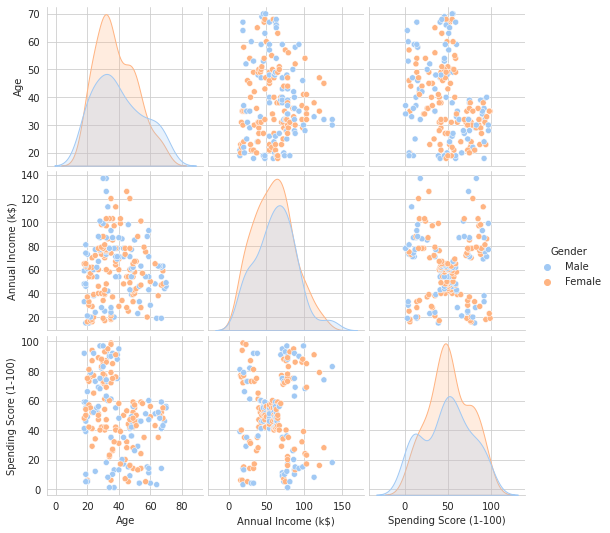

In [ ]:
with sns.axes_style('whitegrid'):
 grafico= sns.pairplot(data=mall, hue='Gender', palette='pastel')

Nota-se que o perfil de compras de clientes de sexo diferentes parece ser o mesmo, foi observado maior concentração entre 30 e 50 anos e pouca variação de gênero, então vamos seguir a analise com os parâmetros: renda, score e idade.


In [ ]:
mall = mall.drop('Gender', axis=1)

In [ ]:
mall.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


**Agrupamento**: Para agrupar os dados em subgrupos, vamos utilizar um modelo de aprendizado de máquina não supervisionado chamado K-means 

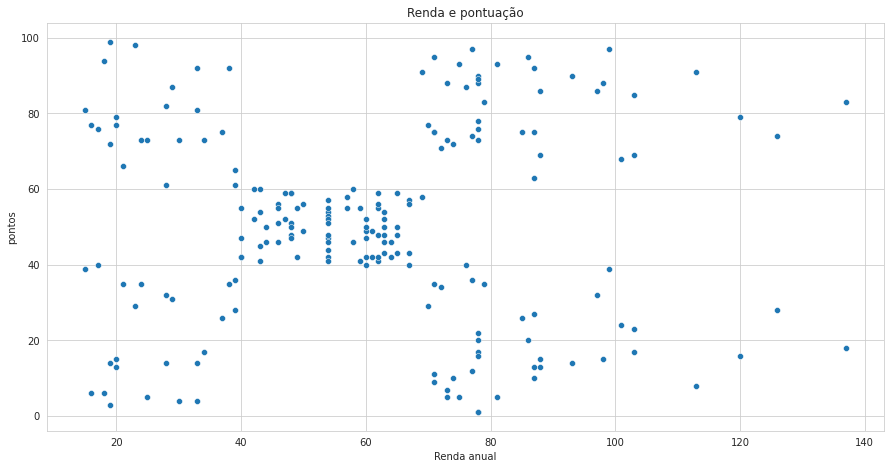

In [ ]:
with sns.axes_style('whitegrid'):
  grafico=sns.scatterplot(data=mall, x='Annual Income (k$)', y='Spending Score (1-100)', palette='pastel')
  grafico.set(title='Renda e pontuação', xlabel='Renda anual', ylabel='pontos')
  grafico.figure.set_size_inches(15,7.5)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model= KMeans(n_clusters=5)
model= model.fit(mall)

In [ ]:
clusters = model.labels_
clusters = pd.DataFrame(clusters, columns=['cluster'])
clustered_mall= pd.concat([mall, clusters], axis=1)
clustered_mall.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,4
1,21,15,81,2
2,20,16,6,4
3,23,16,77,2
4,31,17,40,4


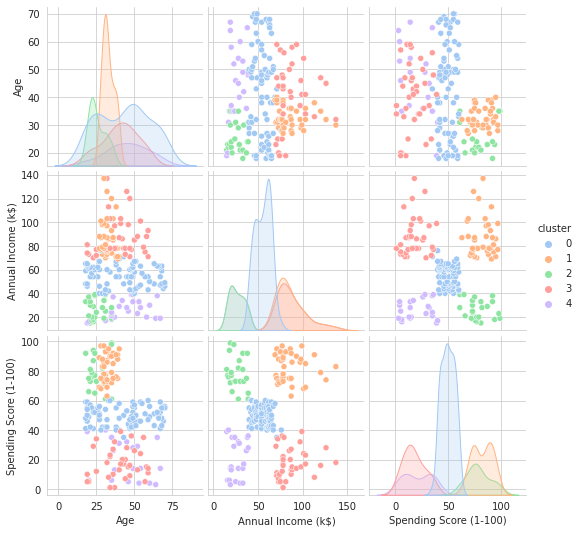

In [ ]:
with sns.axes_style('whitegrid'):
  grafico= sns.pairplot(data=clustered_mall, hue='cluster', palette='pastel')

Com os dados agrupados conseguimos extrair quais são os perfis médios. 


In [ ]:
clusters_centers= model.cluster_centers_
clusters_centers= pd.DataFrame(clusters_centers, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
clusters_centers.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,43.088608,55.291139,49.569620
1,32.692308,86.538462,82.128205
2,25.521739,26.304348,78.565217
3,40.666667,87.750000,17.583333
4,45.217391,26.304348,20.913043


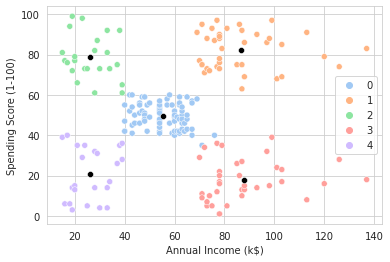

In [ ]:
with sns.axes_style('whitegrid'):
  fig, ax =plt.subplots()
  sns.scatterplot(data=clustered_mall, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='pastel', ax=ax)
  sns.scatterplot(data=clusters_centers, x='Annual Income (k$)', y='Spending Score (1-100)', color='black', palette='pastel', ax=ax)

**Avaliando**: Seriam 5 o número ideal de grupos?

Para responder vamos utilizar o elbow method que busca balancear o erro e a quantidade de grupos

In [ ]:
wcss = []

for k in range(1,11):

  model= KMeans(n_clusters=k)
  model= model.fit(mall)
  wcss.append(model.inertia_)

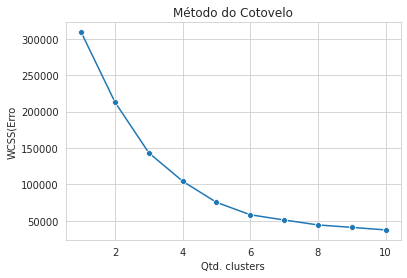

In [ ]:
with sns.axes_style('whitegrid'):
  grafico= sns.lineplot(x=range(1,11), y=wcss, marker='8',palette='pastel')
  grafico.set(title='Método do Cotovelo', ylabel='WCSS(Erro', xlabel='Qtd. clusters');

In [ ]:
model= KMeans(n_clusters=5)
model= model.fit(mall)

**Estudo dos clusters**

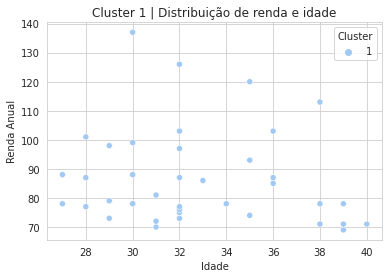

In [ ]:
with sns.axes_style('whitegrid'):
  grafico=sns.scatterplot(data=clustered_mall.query('cluster==1'), x='Age', y='Annual Income (k$)', hue='cluster', palette='pastel')
  grafico.set(title='Cluster 1 | Distribuição de renda e idade', xlabel= 'Idade',ylabel= 'Renda Anual')
  grafico.get_legend().set_title('Cluster');

**Conclusão:** Direcionar campanha de marketing para o público acima de 35 anos. Clientes com alta renda e baixo potencial de compras poderiam gastar mais.